In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

## Loading Data to a Pandas DataFrame

In [2]:
data_file = 'data/cscpopendata.csv'
data_df = pd.read_csv(data_file)

data_df.shape

(113780, 22)

In [3]:
data_df.head()

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,13463-67-7,6,Titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
1,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,65996-92-1,4,Distillates (coal tar),07/01/2009,07/01/2009,NaN,07/01/2009,07/01/2009,NaN,2
2,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,140-67-0,5,Estragole,07/01/2009,07/01/2009,NaN,07/02/2009,07/02/2009,NaN,2
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,13463-67-7,7,Titanium dioxide,07/09/2009,08/28/2013,NaN,07/09/2009,07/09/2009,NaN,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,13463-67-7,8,Titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1


In [4]:
data_df.tail()

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
113775,41351,DP NAIL POLISH ART KIT 18PC,64680.0,TRANSPARENT - N/A - N/A,1250,"NINGBO MEITELI COSMETICS CO.,LTD.",INTERNATIONAL LACQUER,59,Nail Products,65,...,NaN,67737,Isopropyl alcohol manufacture using strong acids,03/31/2020,03/31/2020,NaN,03/31/2020,03/31/2020,NaN,1
113776,41352,DP NAIL POLISH 4PC METALLIC,64681.0,TRANSPARENT - N - N/A,1250,"NINGBO MEITELI COSMETICS CO.,LTD.",INTERNATIONAL LACQUER,59,Nail Products,65,...,NaN,67738,Isopropyl alcohol manufacture using strong acids,03/31/2020,03/31/2020,NaN,03/31/2020,03/31/2020,NaN,1
113777,41353,DP EYESHADOW 44 SHADE CUBE,64682.0,TRANSPARENT - N/A - N/A,1250,"NINGBO MEITELI COSMETICS CO.,LTD.",NANJING CHANGJIANG PETROLEUM & CHEMICAL,44,Makeup Products (non-permanent),48,...,NaN,67739,"Mineral oils, untreated and mildly treated",03/31/2020,03/31/2020,NaN,03/31/2020,03/31/2020,NaN,1
113778,41354,DP EYESHADOW PURSE,64683.0,TRANSPARENT - N/A - N/A,1250,"NINGBO MEITELI COSMETICS CO.,LTD.",NANJING CHANGJIANG PETROLEUM & CHEMICAL,44,Makeup Products (non-permanent),48,...,NaN,67740,"Mineral oils, untreated and mildly treated",03/31/2020,03/31/2020,NaN,03/31/2020,03/31/2020,NaN,1
113779,41355,DP NAIL POLISH GEL LIKE 4PC,64684.0,WHITE - N/A - N/A,1250,"NINGBO MEITELI COSMETICS CO.,LTD.",SUN CHEMICAL,59,Nail Products,65,...,13463-67-7,67741,Titanium dioxide,04/01/2020,04/01/2020,NaN,04/01/2020,04/01/2020,NaN,1


In [5]:
# Get column info
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113780 entries, 0 to 113779
Data columns (total 22 columns):
CDPHId                    113780 non-null int64
ProductName               113780 non-null object
CSFId                     79917 non-null float64
CSF                       79493 non-null object
CompanyId                 113780 non-null int64
CompanyName               113780 non-null object
BrandName                 113568 non-null object
PrimaryCategoryId         113780 non-null int64
PrimaryCategory           113780 non-null object
SubCategoryId             113780 non-null int64
SubCategory               113780 non-null object
CasId                     113780 non-null int64
CasNumber                 107464 non-null object
ChemicalId                113780 non-null int64
ChemicalName              113780 non-null object
InitialDateReported       113780 non-null object
MostRecentDateReported    113780 non-null object
DiscontinuedDate          12906 non-null object
ChemicalCreated

## Handling Null Values

In [6]:
print('Columns with Null Values:')
null_count = data_df.isna().sum()
null_count_df = null_count[null_count > 0].to_frame().reset_index().sort_values(0, ascending=False)
null_count_df.rename(columns={'index': 'Column', 0: 'Number of Null Values'})

Columns with Null Values:


,Column,Number of Null Values
5,ChemicalDateRemoved,110848
4,DiscontinuedDate,100874
1,CSF,34287
0,CSFId,33863
3,CasNumber,6316
2,BrandName,212


In [7]:
# Replace all null BrandName values with 'Missing'
data_df2 = data_df.copy()
data_df2.loc[data_df2['BrandName'].isna()==True, 'BrandName'] = 'Missing'

In [8]:
print('Remaining columns with Null Values:')
null_count2 = data_df2.isna().sum()
null_count2_df = null_count2[null_count2 > 0].to_frame().reset_index().sort_values(0, ascending=False)
null_count2_df.rename(columns={'index': 'Column', 0: 'Number of Null Values'})

Remaining columns with Null Values:


,Column,Number of Null Values
4,ChemicalDateRemoved,110848
3,DiscontinuedDate,100874
1,CSF,34287
0,CSFId,33863
2,CasNumber,6316


### Remaining Columns with Null Values
* ChemicalDateRemoved 
    * **KEEP**, non-null for **reformulated products** only
    * If applicable, date the chemical was removed from product, i.e., reformulation.
* DiscontinuedDate
    * **KEEP**, non-null for **discontinued products** only
    * If applicable, date the product was discontinued.
* CSF 
    * *IGNORE/DROP COLUMN*
    * Color, scent and/or flavor as entered by manufacturer, packer and/or distributor. The color/scent/flavor name is entered as free-text into the reporting database and may contain misspellings or other errors. **Not all products have specific colors, scents or flavors.**
* CSFId
    * *IGNORE/DROP COLUMN*
    * CDPH internal identification number for a color/scent/flavor. **Like CSF, not all products have CSFId.**
* CasNumber
    * *IGNORE/DROP COLUMN* 
    * **Refer to 'CasId'/'ChemicalName' columns instead**
    * Chemical identification number (Chemical Abstracts Service registry number assigned to specific chemical). Note that different forms of a chemical  may have different CAS numbers. What appears here is the CAS number selected by the manufacturer, packer and/or distributor. 

In [9]:
# Refer to 'CasId'/'ChemicalName' columns instead of CasNumber
data_df2[data_df2['CasNumber'].isna()==True][['CasId', 'ChemicalId', 'ChemicalName']]

,CasId,ChemicalId,ChemicalName
49,162,43,Cocamide diethanolamine
62,730,52,Chromium (hexavalent compounds)
432,773,1875,"Retinol/retinyl esters, when in daily dosages ..."
433,773,1876,"Retinol/retinyl esters, when in daily dosages ..."
500,773,453,"Retinol/retinyl esters, when in daily dosages ..."
...,...,...,...
113774,1191,67736,Isopropyl alcohol manufacture using strong acids
113775,1191,67737,Isopropyl alcohol manufacture using strong acids
113776,1191,67738,Isopropyl alcohol manufacture using strong acids
113777,759,67739,"Mineral oils, untreated and mildly treated"


In [10]:
data_df3 = data_df2.copy()
data_df3 = data_df2.drop(columns=['CSF', 'CSFId', 'CasNumber'])
data_df3.head()

,CDPHId,ProductName,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,SubCategory,CasId,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,"Lip Color - Lipsticks, Liners, and Pencils",656,6,Titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
1,3,Glover's Medicated Shampoo,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,Hair Shampoos (making a cosmetic claim),889,4,Distillates (coal tar),07/01/2009,07/01/2009,NaN,07/01/2009,07/01/2009,NaN,2
2,3,Glover's Medicated Shampoo,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,Hair Shampoos (making a cosmetic claim),293,5,Estragole,07/01/2009,07/01/2009,NaN,07/02/2009,07/02/2009,NaN,2
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,Eyeliner/Eyebrow Pencils,656,7,Titanium dioxide,07/09/2009,08/28/2013,NaN,07/09/2009,07/09/2009,NaN,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,Lip Gloss/Shine,656,8,Titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1


In [11]:
print('Final columns with Null Values:')
null_count3 = data_df3.isna().sum()
null_count3_df = null_count3[null_count3 > 0].to_frame().reset_index().sort_values(0, ascending=False)
null_count3_df.rename(columns={'index': 'Column', 0: 'Number of Null Values'})

Final columns with Null Values:


,Column,Number of Null Values
1,ChemicalDateRemoved,110848
0,DiscontinuedDate,100874


## Converting Date Str Columns to Date-Time Type

In [12]:
date_cols = ['InitialDateReported', 'MostRecentDateReported', 'DiscontinuedDate', 
             'ChemicalCreatedAt', 'ChemicalUpdatedAt', 'ChemicalDateRemoved']
data_df4 = data_df3.copy()

data_df4[date_cols] = data_df4[date_cols].apply(pd.to_datetime)

data_df4.info()
data_df4.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113780 entries, 0 to 113779
Data columns (total 19 columns):
CDPHId                    113780 non-null int64
ProductName               113780 non-null object
CompanyId                 113780 non-null int64
CompanyName               113780 non-null object
BrandName                 113780 non-null object
PrimaryCategoryId         113780 non-null int64
PrimaryCategory           113780 non-null object
SubCategoryId             113780 non-null int64
SubCategory               113780 non-null object
CasId                     113780 non-null int64
ChemicalId                113780 non-null int64
ChemicalName              113780 non-null object
InitialDateReported       113780 non-null datetime64[ns]
MostRecentDateReported    113780 non-null datetime64[ns]
DiscontinuedDate          12906 non-null datetime64[ns]
ChemicalCreatedAt         113780 non-null datetime64[ns]
ChemicalUpdatedAt         113780 non-null datetime64[ns]
ChemicalDateRemoved    

,CDPHId,ProductName,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,SubCategory,CasId,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,"Lip Color - Lipsticks, Liners, and Pencils",656,6,Titanium dioxide,2009-06-17,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1
1,3,Glover's Medicated Shampoo,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,Hair Shampoos (making a cosmetic claim),889,4,Distillates (coal tar),2009-07-01,2009-07-01,NaT,2009-07-01,2009-07-01,NaT,2
2,3,Glover's Medicated Shampoo,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,Hair Shampoos (making a cosmetic claim),293,5,Estragole,2009-07-01,2009-07-01,NaT,2009-07-02,2009-07-02,NaT,2
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,Eyeliner/Eyebrow Pencils,656,7,Titanium dioxide,2009-07-09,2013-08-28,NaT,2009-07-09,2009-07-09,NaT,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,Lip Gloss/Shine,656,8,Titanium dioxide,2009-07-09,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1


## Checking for Duplicate Rows 

In [13]:
duplicates_df = data_df4[data_df4.duplicated()]
duplicates_df.shape

(49975, 19)

In [14]:
data_df5 = data_df4.copy()
data_df5 = data_df5.drop_duplicates()
data_df5.shape

(63805, 19)

## Counting Unique Values per Column

In [15]:
print('Number of Unique Values per Column:')
num_unique_df = data_df5.nunique(axis=0).to_frame().reset_index()
num_unique_df.sort_values(0, ascending=False).rename(columns={'index': 'Column', 0: 'Number of Unique Values'})

Number of Unique Values per Column:


,Column,Number of Unique Values
10,ChemicalId,57737
0,CDPHId,36794
1,ProductName,33565
4,BrandName,2706
16,ChemicalUpdatedAt,2283
15,ChemicalCreatedAt,2277
12,InitialDateReported,2232
13,MostRecentDateReported,2134
14,DiscontinuedDate,986
2,CompanyId,633


In [16]:
# Take final df after cleaning
clean_data_df = data_df5

# EDA

## Cosmetics Primary Categories

(array([38579., 10076.,   488.,  2434.,  2794.,  7177.,   425.,  1068.,
          506.,   258.]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <a list of 10 Patch objects>)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text xticklabel objects>)

Text(0.5, 0, 'Cosmetics Category')

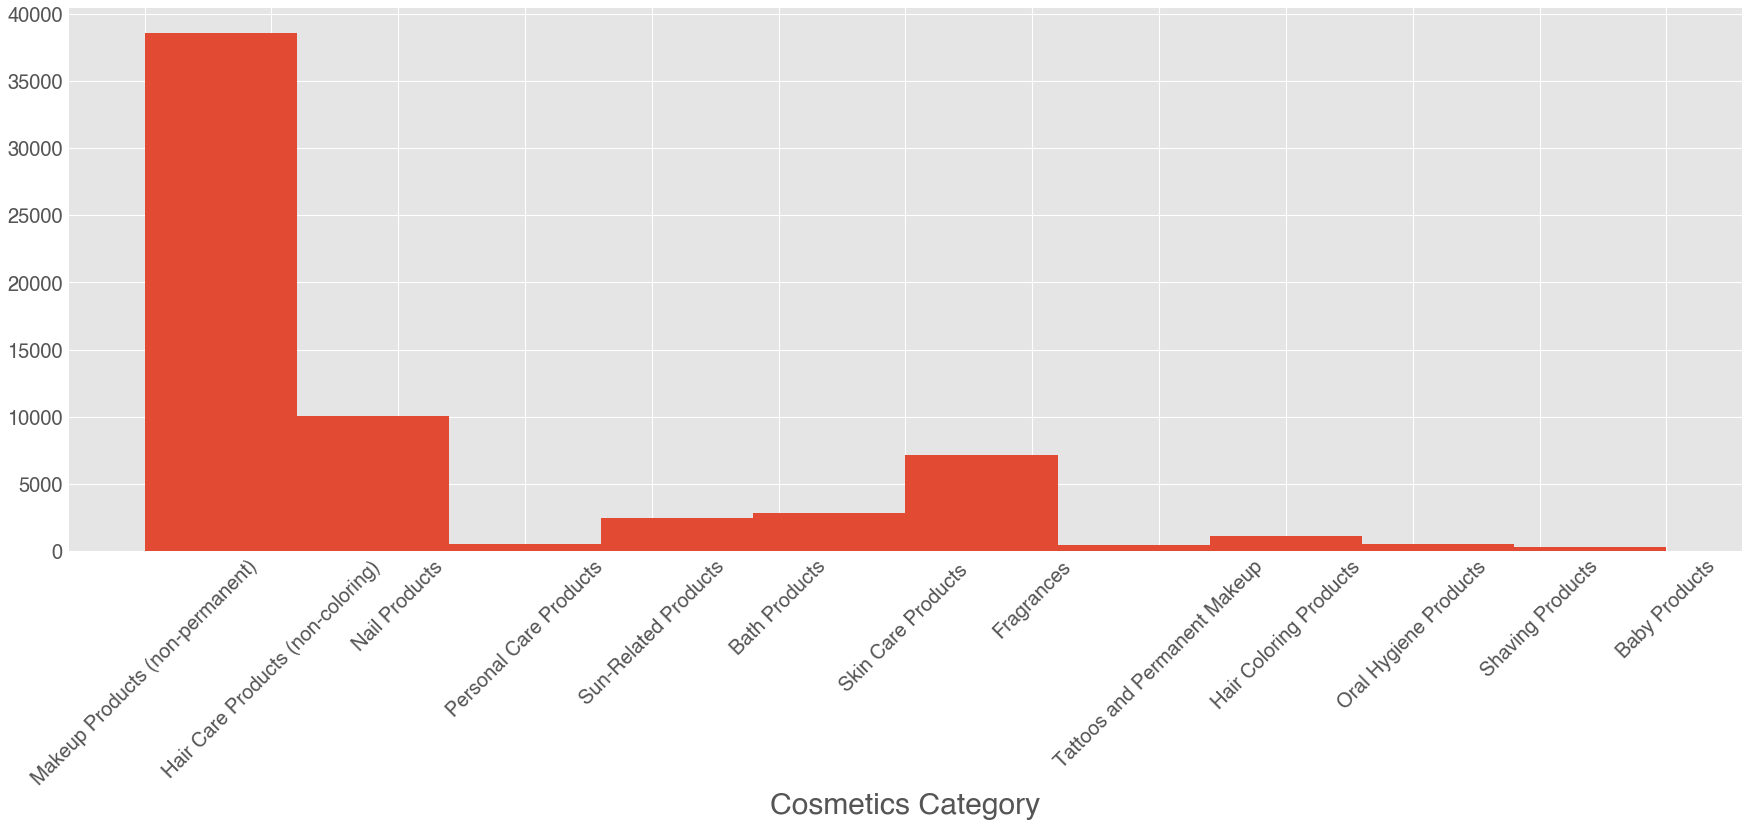

In [17]:
fig, ax = plt.subplots(figsize=(30, 10))
ax.hist(clean_data_df['PrimaryCategory'])
plt.xticks(rotation='45')
ax.tick_params(axis="x", labelsize=20)
ax.tick_params(axis="y", labelsize=20)
ax.set_xlabel('Cosmetics Category', size=30)
plt.show()

In [18]:
clean_data_df['PrimaryCategory'].value_counts()

Makeup Products (non-permanent)      37058
Nail Products                        10076
Skin Care Products                    6671
Bath Products                         2794
Sun-Related Products                  2434
Hair Care Products (non-coloring)     1521
Hair Coloring Products                1068
Fragrances                             506
Oral Hygiene Products                  506
Personal Care Products                 488
Tattoos and Permanent Makeup           425
Shaving Products                       209
Baby Products                           49
Name: PrimaryCategory, dtype: int64

In [19]:
idxes = clean_data_df[clean_data_df['PrimaryCategory']=='Makeup Products (non-permanent)'].index

In [20]:
no_makeup_df = clean_data_df.drop(idxes)

(array([11597.,   488.,  2434.,  2794.,  6671.,   506.,   425.,  1068.,
          506.,   258.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <a list of 10 Patch objects>)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

Text(0.5, 0, 'Cosmetics Category')

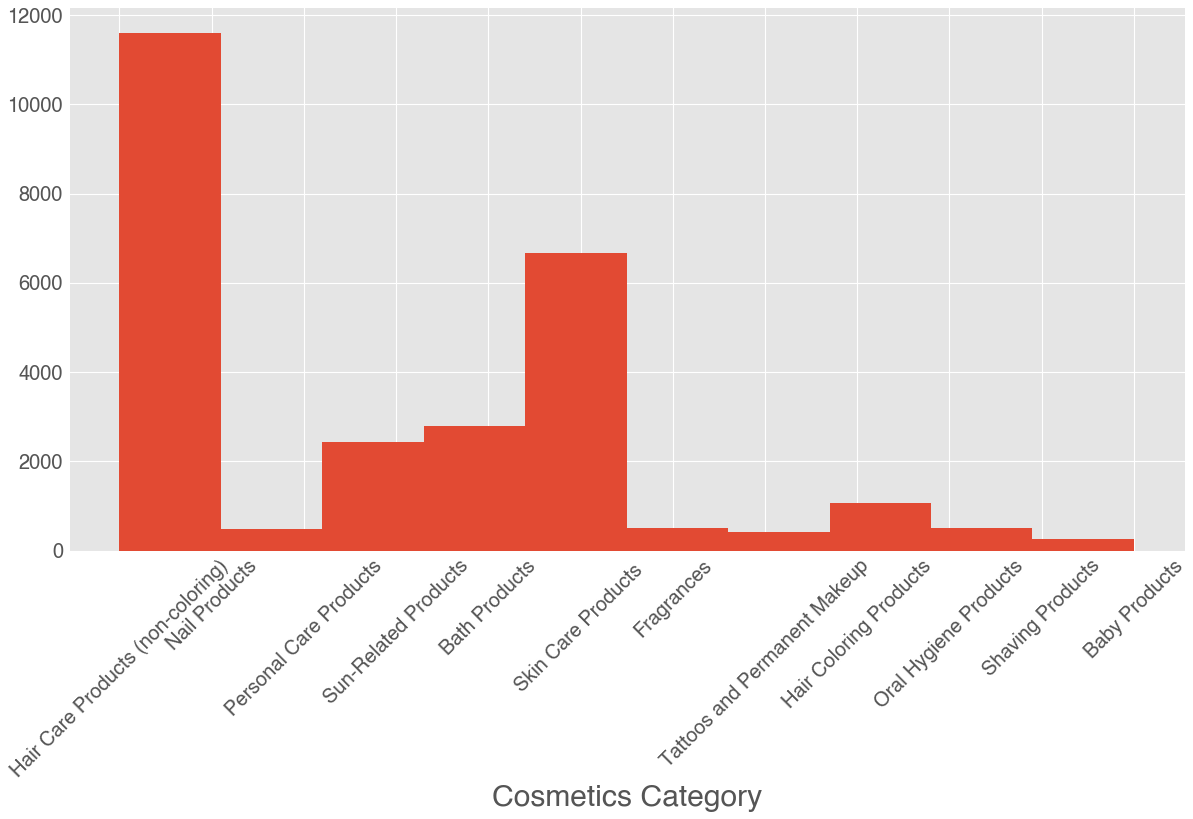

In [21]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.hist(no_makeup_df['PrimaryCategory'])
plt.xticks(rotation='45')
ax.tick_params(axis="x", labelsize=20)
ax.tick_params(axis="y", labelsize=20)
ax.set_xlabel('Cosmetics Category', size=30)
plt.show()

## Chemical Counts

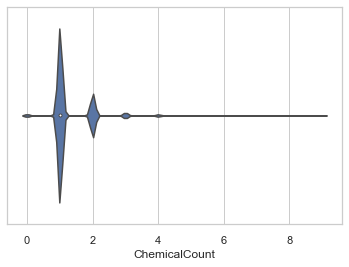

In [22]:
sns.set(style="whitegrid")
ax = sns.violinplot(x=clean_data_df['ChemicalCount'])

In [23]:
clean_data_df['ChemicalCount'].value_counts()

1    48385
2    12140
3     1672
0      779
4      658
5       70
8       41
7       36
6       15
9        9
Name: ChemicalCount, dtype: int64

In [24]:
five_or_more_chemicals_list = [i for i in range(5,10)]
five_or_more_chemicals_df = clean_data_df[clean_data_df['ChemicalCount']
                                          .isin(five_or_more_chemicals_list)]
five_or_more_chemicals_df.head()

,CDPHId,ProductName,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,SubCategory,CasId,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
2555,862,Best of Skintentions,18,Bliss World LLC,Bliss,90,Skin Care Products,92,Anti-Wrinkle/Anti-Aging Products (making a cos...,773,922,"Retinol/retinyl esters, when in daily dosages ...",2009-09-14,2009-09-18,NaT,2009-09-14,2009-09-21,2009-09-21,5
2556,862,Best of Skintentions,18,Bliss World LLC,Bliss,90,Skin Care Products,92,Anti-Wrinkle/Anti-Aging Products (making a cos...,656,923,Titanium dioxide,2009-09-14,2009-09-18,NaT,2009-09-14,2009-09-21,2009-09-21,5
2557,862,Best of Skintentions,18,Bliss World LLC,Bliss,90,Skin Care Products,92,Anti-Wrinkle/Anti-Aging Products (making a cos...,754,1254,"2,4-Hexadienal (89% trans, trans isomer; 11% c...",2009-09-14,2009-09-18,NaT,2009-09-18,2009-09-18,2009-09-18,5
2558,862,Best of Skintentions,18,Bliss World LLC,Bliss,90,Skin Care Products,92,Anti-Wrinkle/Anti-Aging Products (making a cos...,773,1446,"Retinol/retinyl esters, when in daily dosages ...",2009-09-14,2009-09-18,NaT,2009-09-21,2009-09-21,NaT,5
2559,862,Best of Skintentions,18,Bliss World LLC,Bliss,90,Skin Care Products,92,Anti-Wrinkle/Anti-Aging Products (making a cos...,656,1447,Titanium dioxide,2009-09-14,2009-09-18,NaT,2009-09-21,2009-09-21,NaT,5


In [25]:
zero_chemicals_df = clean_data_df[clean_data_df['ChemicalCount']==0]
zero_chemicals_df.head()

,CDPHId,ProductName,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,SubCategory,CasId,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
31,24,White Premium Lotion Soap,181,"GOJO Industries, Inc.",GOJO�,74,Personal Care Products,170,Hand Cleansers and Sanitizers,162,26,Cocamide diethanolamine,2009-07-23,2012-02-07,NaT,2009-07-23,2012-02-07,2010-12-30,0
497,333,Gentle Cleanser,71,"Sunrider Manufacturing, L.P.",Kandesn,6,Bath Products,159,Body Washes and Soaps,162,350,Cocamide diethanolamine,2009-09-02,2013-09-16,NaT,2009-09-02,2013-09-16,2009-11-23,0
498,334,Cleansing Foam,71,"Sunrider Manufacturing, L.P.",Kandesn,90,Skin Care Products,93,Skin Cleansers,162,351,Cocamide diethanolamine,2009-09-02,2013-09-16,NaT,2009-09-02,2009-09-03,2009-09-02,0
499,334,Cleansing Foam,71,"Sunrider Manufacturing, L.P.",Kandesn,90,Skin Care Products,93,Skin Cleansers,162,412,Cocamide diethanolamine,2009-09-02,2013-09-16,NaT,2009-09-03,2013-12-05,2009-09-02,0
500,334,Cleansing Foam,71,"Sunrider Manufacturing, L.P.",Kandesn,90,Skin Care Products,93,Skin Cleansers,773,453,"Retinol/retinyl esters, when in daily dosages ...",2009-09-02,2013-09-16,NaT,2009-09-03,2013-12-05,2103-12-05,0


(array([279., 178., 110.,  36.,  76.,  12.,  11.,   6.,   3.,  68.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <a list of 10 Patch objects>)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

Text(0.5, 0, 'Cosmetics Category')

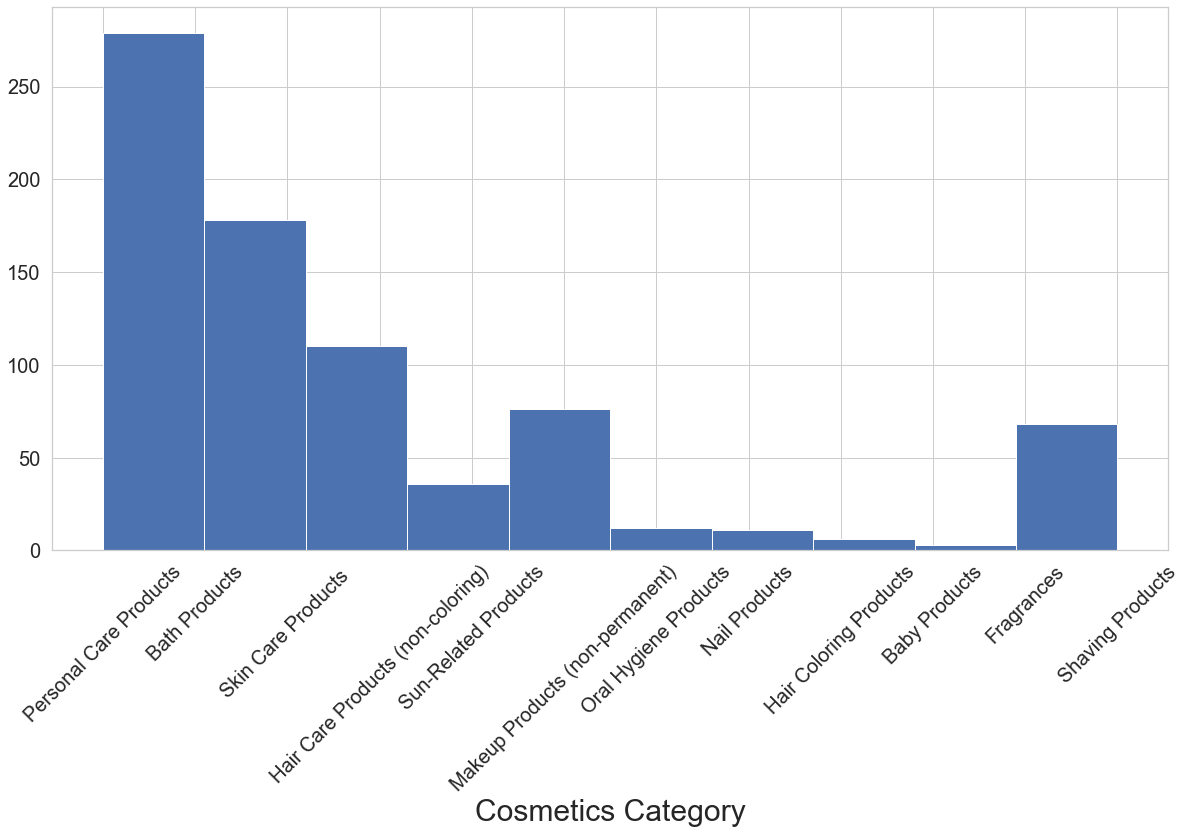

In [26]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.hist(zero_chemicals_df['PrimaryCategory'])
plt.xticks(rotation='45')
ax.tick_params(axis="x", labelsize=20)
ax.tick_params(axis="y", labelsize=20)
ax.set_xlabel('Cosmetics Category', size=30)
plt.show()

## Discontinued Products

In [27]:
discontinued_df = clean_data_df[clean_data_df['DiscontinuedDate'].isna()==False]
discontinued_df.head()

,CDPHId,ProductName,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,SubCategory,CasId,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,"Lip Color - Lipsticks, Liners, and Pencils",656,6,Titanium dioxide,2009-06-17,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,Lip Gloss/Shine,656,8,Titanium dioxide,2009-07-09,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1
5,6,JILLIAN DEMPSEY FOR AVON CELESTIAL EYESHADOW-A...,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),48,Eye Shadow,656,9,Titanium dioxide,2009-07-09,2013-08-28,2010-11-01,2009-07-09,2009-07-09,NaT,1
30,18,SPECTRA LASH MASCARA �,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),162,Mascara/Eyelash Products,656,24,Titanium dioxide,2009-07-20,2013-08-28,2012-02-01,2009-07-20,2009-07-20,NaT,1
381,222,ANEW EYELIFTING SERUM SHADOW-ALL SHADES �,4,New Avon LLC,ANEW,44,Makeup Products (non-permanent),48,Eye Shadow,656,235,Titanium dioxide,2009-09-01,2013-08-28,2012-11-01,2009-09-01,2009-09-01,NaT,2


In [28]:
discontinued_df

,CDPHId,ProductName,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,SubCategory,CasId,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,"Lip Color - Lipsticks, Liners, and Pencils",656,6,Titanium dioxide,2009-06-17,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,Lip Gloss/Shine,656,8,Titanium dioxide,2009-07-09,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1
5,6,JILLIAN DEMPSEY FOR AVON CELESTIAL EYESHADOW-A...,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),48,Eye Shadow,656,9,Titanium dioxide,2009-07-09,2013-08-28,2010-11-01,2009-07-09,2009-07-09,NaT,1
30,18,SPECTRA LASH MASCARA �,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),162,Mascara/Eyelash Products,656,24,Titanium dioxide,2009-07-20,2013-08-28,2012-02-01,2009-07-20,2009-07-20,NaT,1
381,222,ANEW EYELIFTING SERUM SHADOW-ALL SHADES �,4,New Avon LLC,ANEW,44,Makeup Products (non-permanent),48,Eye Shadow,656,235,Titanium dioxide,2009-09-01,2013-08-28,2012-11-01,2009-09-01,2009-09-01,NaT,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110044,40075,"MultiVitamin toner with vitamins A,C & E norma...",395,"Herbalife International of America, Inc.",Nourifusion,90,Skin Care Products,103,Skin Toner (making a cosmetic claim),773,65540,"Retinol/retinyl esters, when in daily dosages ...",2019-10-09,2019-10-09,2014-11-05,2019-10-09,2019-10-09,NaT,1
110501,40251,SeroVital Complete EYE AREA Renewal Complex,1352,"SanMedica International, LLC","SanMedica International, LLC",90,Skin Care Products,92,Anti-Wrinkle/Anti-Aging Products (making a cos...,1242,66583,Ethanol in alcoholic beverages,2019-10-30,2019-12-19,2019-12-01,2019-12-19,2019-12-19,NaT,1
111791,40743,Lid Stuff Eyeshadow Palette,784,Soap and Glory Ltd,Soap & Glory,44,Makeup Products (non-permanent),48,Eye Shadow,656,66648,Titanium dioxide,2019-12-30,2019-12-30,2018-01-01,2019-12-30,2019-12-30,NaT,1
111805,40747,Sexy Mother Pucker Mini Gloss Sticks - Glossed...,784,Soap and Glory Ltd,Soap & Glory,44,Makeup Products (non-permanent),52,Lip Gloss/Shine,656,66657,Titanium dioxide,2019-12-30,2019-12-30,2019-01-01,2019-12-30,2019-12-30,NaT,1


## Reformulated Products

In [29]:
reformulated_df = clean_data_df[clean_data_df['ChemicalDateRemoved'].isna()==False]
reformulated_df.head()

,CDPHId,ProductName,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,SubCategory,CasId,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
31,24,White Premium Lotion Soap,181,"GOJO Industries, Inc.",GOJO�,74,Personal Care Products,170,Hand Cleansers and Sanitizers,162,26,Cocamide diethanolamine,2009-07-23,2012-02-07,NaT,2009-07-23,2012-02-07,2010-12-30,0
36,29,Aloe Up Lil' Kids SPF 45 Aloe Based Sunscreen ...,31,"Aloecare International, LLC",Aloe Up Lil' Kids SPF 45 Aloe Based Sunscreen ...,106,Sun-Related Products,107,Sunscreen (making a cosmetic claim),656,39,Titanium dioxide,2009-08-11,2009-08-11,NaT,2009-08-21,2009-08-21,2009-08-21,1
224,71,Colorstay 12 Hour Eye Shadow Quad- rose shimme...,23,Revlon Consumer Product Corporation,Revlon,44,Makeup Products (non-permanent),48,Eye Shadow,656,78,Titanium dioxide,2009-08-26,2009-08-26,NaT,2009-08-26,2009-09-14,2009-09-14,1
431,269,Elizabeth Arden Green Tea Relaxing Bubble Bath,69,"Elizabeth Arden, Inc.",Elizabeth Arden,6,Bath Products,9,Bubble and Foam Bath Products,656,281,Titanium dioxide,2009-09-01,2017-01-12,2013-05-13,2009-09-01,2009-09-25,2009-09-25,1
432,269,Elizabeth Arden Green Tea Relaxing Bubble Bath,69,"Elizabeth Arden, Inc.",Elizabeth Arden,6,Bath Products,9,Bubble and Foam Bath Products,773,1875,"Retinol/retinyl esters, when in daily dosages ...",2009-09-01,2017-01-12,2013-05-13,2009-09-25,2009-09-29,2009-09-29,1


# Mon, 4/6
* There are 36,794 unique products identified by CDPHId
    * Can have multiple categories (PrimaryCategory, SubCategory) 
    * Can have multiple chemicals (ChemicalName)
```
Number of Unique Values per Column:
Column	Number of Unique Values
10	ChemicalId	57737
0	CDPHId	36794
1	ProductName	33565
4	BrandName	2706
16	ChemicalUpdatedAt	2283
15	ChemicalCreatedAt	2277
12	InitialDateReported	2232
13	MostRecentDateReported	2134
14	DiscontinuedDate	986
2	CompanyId	633
3	CompanyName	604
17	ChemicalDateRemoved	519
9	CasId	134
11	ChemicalName	123
7	SubCategoryId	92
8	SubCategory	89
6	PrimaryCategory	13
5	PrimaryCategoryId	13
18	ChemicalCount	10
```
* Need to investigate:
    * Number of unique CDPHId vals != Number of unique ProductName vals
    * Number of unique CompanyId vals != Number of unique CompanyName vals
    * Number of unique CasId vals != Number of unique ChemicalName vals
    * Number of unique SubCategoryId vals != Number of unique SubCategory vals